In [336]:
print("Recent contributors and numbers to the plastic pullution in our waterways.")

#Ingest, analyze and display multiple pieces of data.

import pandas as pd # pandas is being used for data cleansing and normalization
import numpy as np # is being used for mathematical operations
import matplotlib.pyplot as plt # is used for data visualization
import matplotlib.patches as mpatches
import seaborn as sns # the data visualization library used in conjuction with matplotlib
import plotly.express as px # for plotting the data on world mapfrom 
from mpl_toolkits.basemap import Basemap
from IPython.display import Image





Recent contributors and numbers to the plastic pullution in our waterways.


Import csv & xlsx files for data parsing.

In [337]:
#Import data from csv file downloaded from ourworldindata.org/plastic-pullution
global_share = pd.read_csv(r"assets\global_mismanaged_plastic_waste.csv")
rivers = pd.read_csv(r"assets\plastics_top_rivers.csv")
ocean_totals = pd.read_csv(r"assets\ocean_waste_ton.csv")
global_waste = pd.read_csv(r"assets\global_waste_2_ocean.csv")
marine_wildlife = pd.read_excel (r"assets\marine_wildlife.xlsx")

In [338]:
#Intro image
print("There is no other option!")
Image(url= "assets/intro.jpg", width=500, height=400)

There is no other option!


Cleanse and merge csv files to produce the answer to "Which countries produce the most plastic waste?" and "Which countries emit most plastic waste to the oceans?" This data will be displayed in a stacked bar chart.

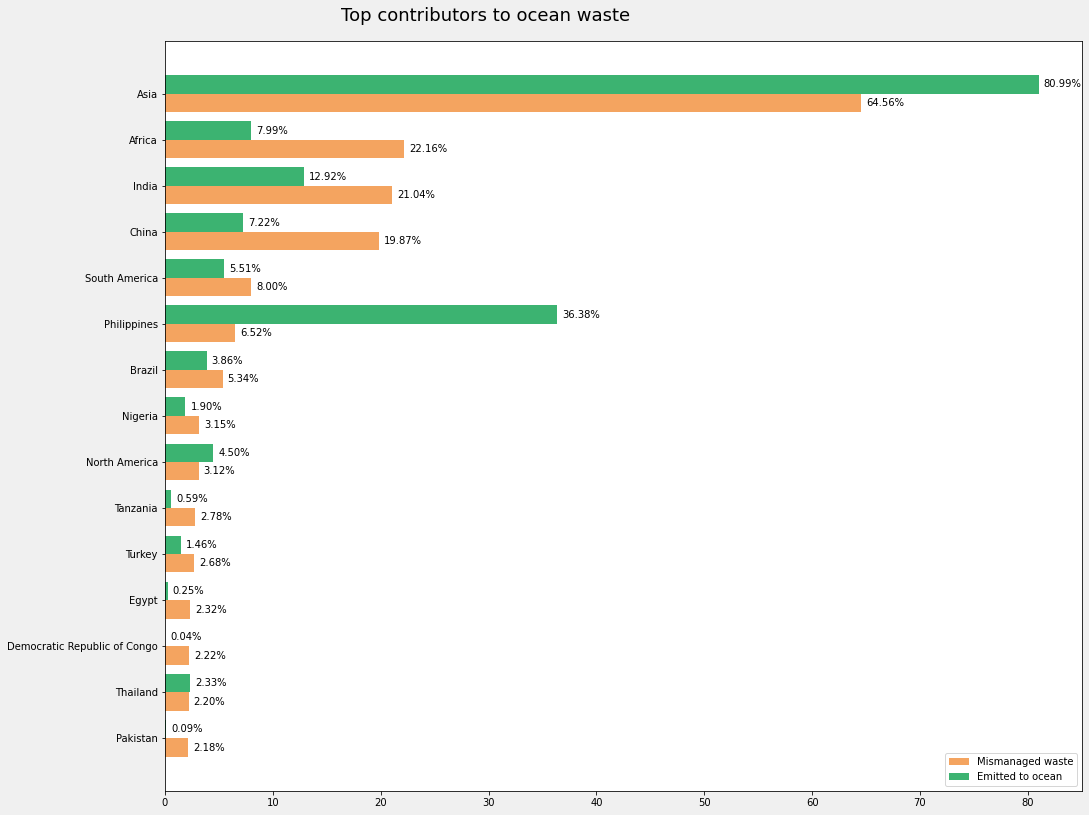

In [339]:
#Cleanse imported csv file
#Answer question: Which countries produce the most plastic waste? and Which countries emit most plastic waste to the oceans? in a stacked bar chart.

#drop unnecessary columns and rename remaining
global_share.drop(["Year","Code"], axis=1, inplace=True)
global_share.rename(columns = {"Share of global mismanaged plastic waste": "Mismanaged plastic waste"}, inplace=True)
global_share
global_waste.drop(["Year","Code"], axis=1, inplace=True)
global_waste.rename(columns = {"Global waste to ocean percentage": "Waste to ocean"}, inplace=True)
global_waste

#merge 2 csv files and sort data based on Entity
combined = pd.merge(global_share, global_waste, how="outer", on=["Entity"])
combined_values = pd.DataFrame(combined, columns=["Entity", "Mismanaged plastic waste", "Waste to ocean"])
combined_sorted = combined_values.sort_values(by="Mismanaged plastic waste", ascending=False)
combined_sorted.set_index("Entity", inplace=True)
ranking = combined_sorted.head(15)

#print(combined_sorted.head(15))

# Design horizontal grouped bar chart
first_bar = ranking["Mismanaged plastic waste"]
first_bar_label = "Mismanaged waste"
first_bar_color = "sandybrown"
second_bar = ranking["Waste to ocean"]
second_bar_label = "Emitted to ocean"
second_bar_color = "mediumseagreen"
labels = ranking.index
width = 0.4  
plot_title = "Top contributors to ocean waste"
title_size = 18
filename = 'barh-plot'

fig, ax = plt.subplots(figsize=(20,12), facecolor=(.94, .94, .94))
plt.tight_layout()
y = np.arange(len(labels))  
perc1 = ax.barh(y + width/2, first_bar, width, label=first_bar_label, color=first_bar_color)
perc2 = ax.barh(y - width/2, second_bar, width, label=second_bar_label, color=second_bar_color)
plt.gca().invert_yaxis()
title = plt.title(plot_title, pad=20, fontsize=title_size)
title.set_position([.35, 1])
plt.subplots_adjust(left=0.35, top=0.9)


ax.set_yticks(y)
ax.set_yticklabels(labels)

ax.bar_label(perc1, fmt='%.2f%%', padding=5)
ax.bar_label(perc2, fmt='%.2f%%', padding=5)

ax.legend()
plt.yticks(np.arange(min(y), max(y)+1, 1.0))
plt.show()



CLeanse csv and display "Which rivers emit the most plastic to the ocean?" in a horizontal bar chart.

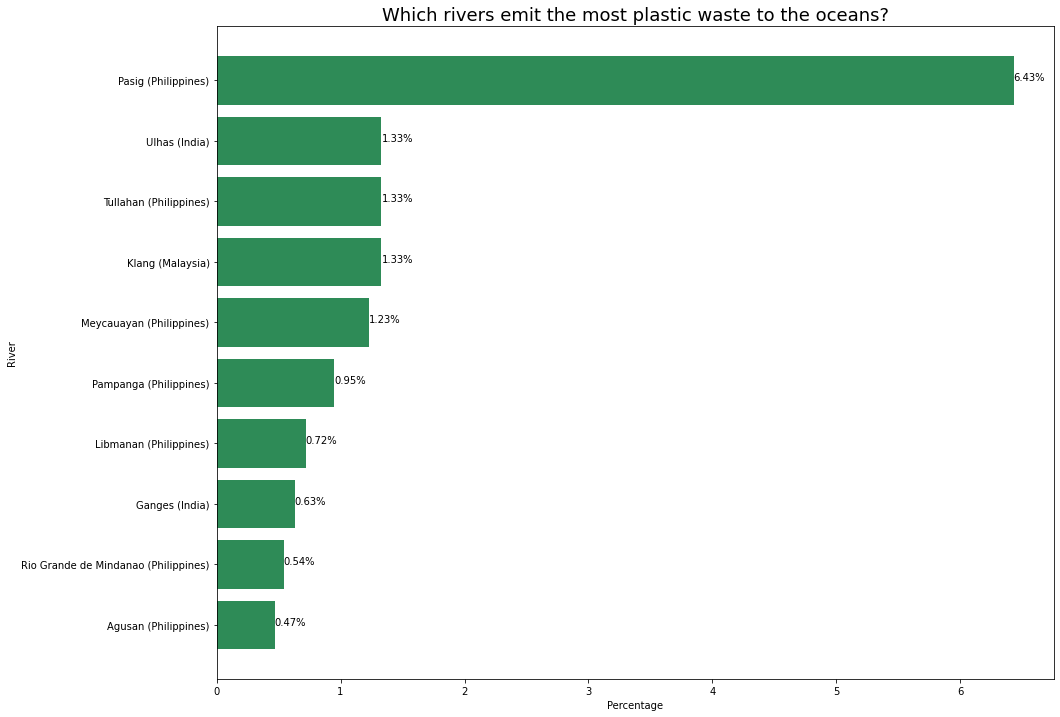

In [340]:
#Cleanse imported csv file
#Answer question: Which rivers emit most plastic to oceans?

#drop unnecessary columns and rename remaining
rivers.drop(["Year","Code"], axis=1, inplace=True)
rivers.rename(columns = {"Global plastics emitted to ocean in percentage": "River Percentage"}, inplace=True)
rivers

#sort data based on percentage
top_10_rivers = rivers.sort_values(by=["River Percentage"], ascending=False).head(10)
top_10_rivers["River Percentage"] = top_10_rivers["River Percentage"].round(2)
#print(top_10_rivers)


#set x,y paramerters
perc=top_10_rivers["River Percentage"]
entity=top_10_rivers["Entity"]


plt.figure(figsize=(15,12))
bars = plt.barh(entity, perc, color='seagreen', label="center")

for bar in bars:
    width = bar.get_width()
    label_y = bar.get_y() + bar.get_height() /2
    plt.text(width, label_y, s=f"{width}" + "%")
        

plt.gca().invert_yaxis()
plt.title("Which rivers emit the most plastic waste to the oceans?", fontsize=18)
plt.ylabel("River")
plt.xlabel("Percentage")


plt.show()



Cleanse csv and answer "Which oceans have the most plastic waste?" in a Basemap diagram.

The total global amount of plastic in the oceans is 268,950 tons!


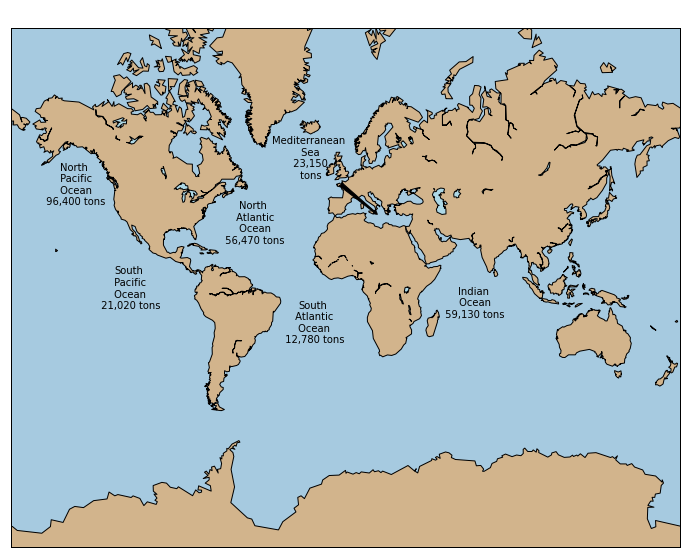

In [341]:
#Cleanse imported csv file
#Answer question: Which oceans have the most plastic waste?

#drop unnecessary columns and rename
ocean_totals.drop(['Code', 'Year'], axis=1, inplace=True)
ocean_totals
ocean_totals.rename(columns = {'All sizes (total mass) ton': 'Total Mass (ton)'}, inplace=True)
ocean_totals
#print(ocean_totals)

#bold font
print("\033[91m" + "The total global amount of plastic in the oceans is 268,950 tons!" + "\033[0m")

#design world map
fig = plt.figure(num=None, figsize=(12, 12) )
m = Basemap(projection='merc',llcrnrlat=-80,urcrnrlat=80,llcrnrlon=-180,urcrnrlon=180,resolution='c')
m.drawmapboundary(fill_color='#A6CAE0')
m.drawcoastlines()
m.fillcontinents(color='tan',lake_color='lightblue')


#add annotations to map
plt.annotate('Indian\n Ocean\n 59,130 tons', m(68.75,-8.35), fontsize=10, ha='center', va='center')
plt.annotate('Mediterranean\n Sea\n 23,150\n tons', m(17.94,36.09), xytext=m(-19.56,56.87), fontsize=10, ha='center', va='center', arrowprops=dict(arrowstyle="fancy", color='black'))
plt.annotate('North\n Atlantic\n Ocean\n 56,470 tons', m(-49.57,32.57), fontsize=10, ha='center', va='center')
plt.annotate('South\n Atlantic\n Ocean\n 12,780 tons', m(-17.56,-18.53), fontsize=10, ha='center', va='center')
plt.annotate('North\n Pacific\n Ocean\n 96,400 tons', m(-145.88,48.32), fontsize=10, ha='center', va='center')
plt.annotate('South\n Pacific\n Ocean\n 21,020 tons', m(-116.53,-0.53), fontsize=10, ha='center', va='center')
plt.title('Which ocean has the most plastic waste?', fontsize=20, color='white')
plt.show()

Cleanse xlsx diagram the answer to "How does this impact marine wildlife?" 

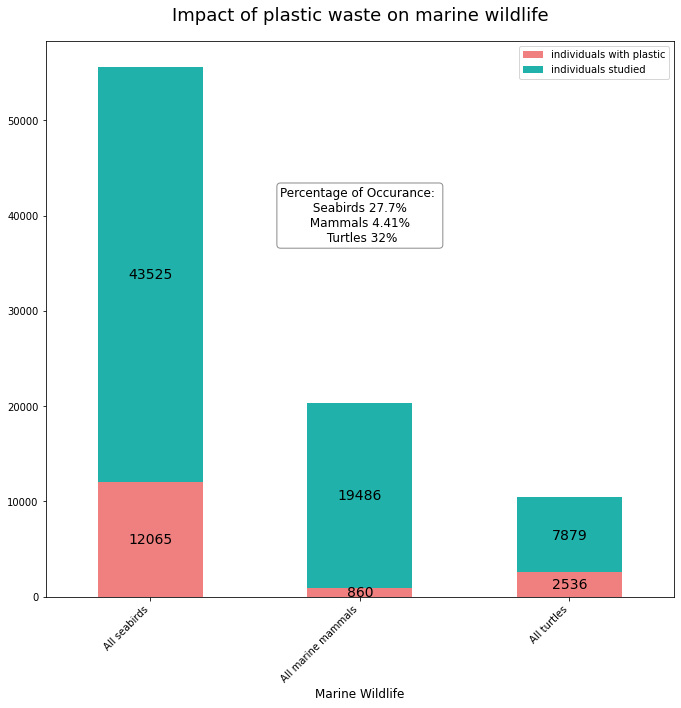

In [342]:
#Answer question: How does this impact marine wildlife?
#gathered from https://www.sciencedirect.com/science/article/pii/S0025326X19310148?via%3Dihub


marine_wildlife = pd.read_excel("assets\marine_wildlife.xlsx", sheet_name= "wildlife_grouped")
marine_wildlife.set_index('species studied', inplace=True)
marine_wildlife

ax = marine_wildlife.iloc[:, [3, 2]].plot.bar(align='center', stacked=True, figsize=(12, 12), color= ["lightcoral", "lightseagreen"])
plt.tight_layout()

title = plt.title('Impact of plastic waste on marine wildlife', pad=20, fontsize=18, color= "black")

plt.subplots_adjust(top=0.8, left=0.26)
plt.xlabel("Marine Wildlife", fontsize = 12, color = "black")
plt.xticks(fontsize = 10, rotation = 45, ha="right")
plt.yticks(fontsize = 10)

legend = plt.legend(loc='upper right')

bbox_props = dict(boxstyle="round", fc="w", ec="0.5", alpha=0.9)
ax.text(1,40000,"Percentage of Occurance: \n Seabirds 27.7% \n Mammals 4.41% \n Turtles 32%", ha="center", va="center", size=12, bbox=bbox_props) 

for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.text(x+width/2, 
            y+height/2,
            '{:.0f}'.format(height), 
            ha='center', 
            va='center',
            color='black',
            fontsize=14,)

plt.show()

In [343]:
#What can we do image
print("Let's do what we can to reduce plastic waste!")
Image(url= "assets/reduce_waste.jpg", width=750, height=750)

Let's do what we can to reduce plastic waste!
